In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [2]:
colormap = {0:'black', 1:'red', 2:'blue'}
def plot_region(model,dlim,features=[]):
    d1lim = dlim[:2]
    d2lim = dlim[2:]
    d1_grid, d2_grid = np.meshgrid(np.arange(d1lim[0], d1lim[1], 0.02), np.arange(d2lim[0], d2lim[1], 0.02))
    X0 = d1_grid.ravel()
    X1 = d2_grid.ravel()
    
    d12_array = np.empty((len(X0),2+len(features)))
    d12_array[:,0] = X0
    d12_array[:,1] = X1
    i=2

    for feature in features:
        d12_array[:,i] = feature(X0,X1)
        i += 1
    
    y_array = model.predict(d12_array)
    y_grid = y_array.reshape(d1_grid.shape)
    plt.contourf(d1_grid, d2_grid, y_grid, cmap='Pastel2')

In [2]:
def plot_region_scatter(model,features=[]):

    plt.figure(figsize=(8,7))

    # Data with a scatter plot
    s = plt.scatter(x=X.iloc[:,0], y=X.iloc[:,1], c=wine.iloc[:,-1].map(colormap))
    a = plt.axis()
    s.set_zorder(2)

    # plot the two regions
    print(features)
    plot_region(model,a,features)

    plt.xlabel(x0,fontsize=20)
    plt.ylabel(x1,fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

In [4]:
import sklearn.datasets as datasets
data = datasets.load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
wine['class'] = data.target

In [5]:
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
sum(wine['class']==0), sum(wine['class']==1), sum(wine['class']==2)

(59, 71, 48)

## Keep certain features

In [7]:
x0 = 'total_phenols'
x1 = 'color_intensity'

In [8]:
X = wine.loc[:,[x0,x1]]
y = wine.loc[:,'class']

In [9]:
wine[[x0,x1,'class']]

,total_phenols,color_intensity,class
0,2.80,5.64,0
1,2.65,4.38,0
2,2.80,5.68,0
3,3.85,7.80,0
4,2.80,4.32,0
...,...,...,...
173,1.68,7.70,2
174,1.80,7.30,2
175,1.59,10.20,2
176,1.65,9.30,2


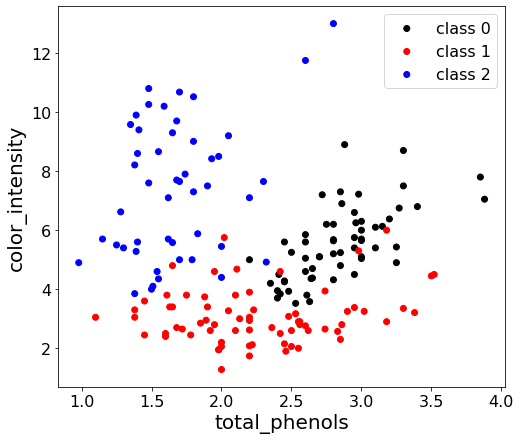

In [10]:
fig, ax = plt.subplots(figsize=(8,7))
colors = y.map(colormap)
for i in range(3):
    ind = y==i
    plt.scatter(x=X.loc[ind,x0], y=X.loc[ind,x1],c=colors.loc[ind],label='class {0}'.format(i))
plt.legend(fontsize=16)
plt.xlabel(x0,fontsize=20)
plt.ylabel(x1,fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# Three classifiers

In [11]:
ctree = tree.DecisionTreeClassifier(max_depth=2)
ctree = ctree.fit(X, y)

[]


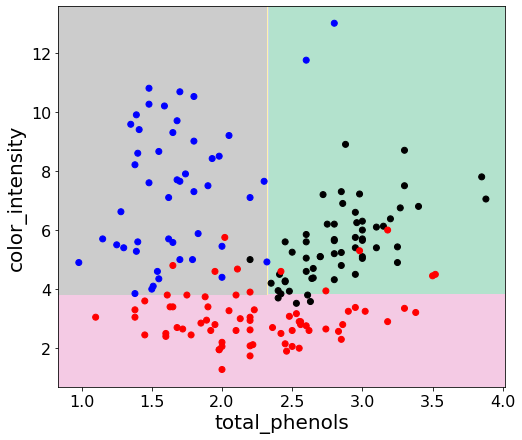

In [12]:
plot_region_scatter(ctree,features=[])

[]


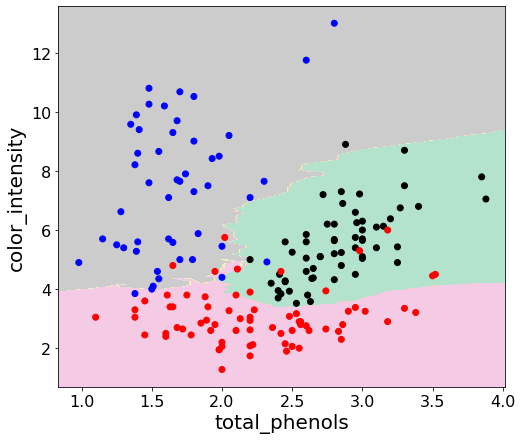

In [13]:
plot_region_scatter(KNeighborsClassifier(n_neighbors=10).fit(X,y),features=[])

[]


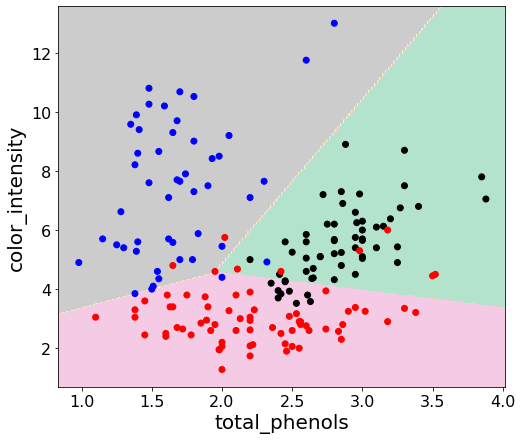

In [14]:
lr = LogisticRegression(multi_class='multinomial').fit(X, y)
plot_region_scatter(lr,features=[])

## Group classes 1 and 2 into class 1

In [15]:
X = wine.loc[:,[x0,x1]]
y = wine.loc[:,'class']
y[y==2] = 1

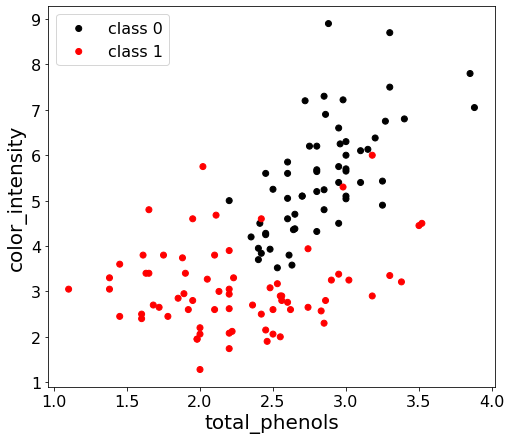

In [16]:
fig, ax = plt.subplots(figsize=(8,7))
colors = y.map(colormap)
for i in range(2):
    ind = y==i
    plt.scatter(x=X.loc[ind,x0], y=X.loc[ind,x1],c=colors.loc[ind],label='class {0}'.format(i))
plt.legend(fontsize=16)
plt.xlabel(x0,fontsize=20)
plt.ylabel(x1,fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## add quadratic features

In [17]:
x0 = 'total_phenols'
x1 = 'color_intensity'

X = wine[[x0,x1]]
X['phi0'] = X[x0]*X[x1]
X['phi1'] = X[x0]**2
X['phi2'] = X[x1]**2

/home/gomes/miniconda3/envs/d178/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [18]:
lr = LogisticRegression(multi_class='multinomial').fit(X, y)

/home/gomes/miniconda3/envs/d178/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[<function <lambda> at 0x7fe915e0d940>, <function <lambda> at 0x7fe915e0d9d0>, <function <lambda> at 0x7fe915e0da60>]


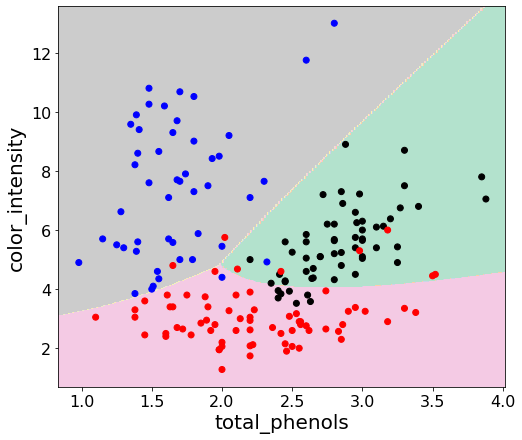

In [19]:
phi = [lambda x0,x1: x0*x1, lambda x0,x1: x0**2, lambda x0,x1: x1**2]

plot_region_scatter(lr,phi)

## add cubic features

In [20]:


# X with two basic columns
X = wine.loc[:,[x0,x1]]

# Add nonlinear feature columns
X['phi0'] = X[x0]*X[x1]
X['phi1'] = X[x0]**2
X['phi2'] = X[x1]**2
X['phi3'] = X[x0]*X[x0]*X[x1]
X['phi4'] = X[x0]*X[x1]*X[x1]
X['phi5'] = X[x0]**3
X['phi6'] = X[x1]**3


# X0 = wine.loc[:,x0].values
# X1 = wine.loc[:,x1].values
# for i in range(len(phi)):
#     X['phi{0}'.format(i)] = phi[i](X0,X1)

# run logistic regression
lr = LogisticRegression(multi_class='multinomial').fit(X, y)



/home/gomes/miniconda3/envs/d178/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[<function <lambda> at 0x7fe91622e700>, <function <lambda> at 0x7fe91622e670>, <function <lambda> at 0x7fe91622edc0>, <function <lambda> at 0x7fe91622ed30>, <function <lambda> at 0x7fe91622e280>, <function <lambda> at 0x7fe91622e3a0>, <function <lambda> at 0x7fe91622e310>]


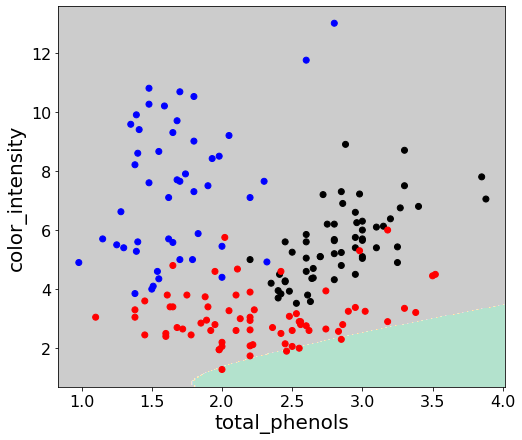

In [21]:
phi = [lambda x0, x1: x0*x1, 
       lambda x0, x1: x0**2, 
       lambda x0, x1: x1**2, 
       lambda x0, x1: x0*x0*x1, 
       lambda x0, x1: x0*x1*x1, 
       lambda x0, x1: x1**3, 
       lambda x0, x1: x0**3 ]

plot_region_scatter(lr,phi)

## Exponential features

In [22]:


# X with two basic columns
X = wine.loc[:,[x0,x1]]

X['phi0'] = np.exp(X[x0])
X['phi1'] = np.exp(X[x1])
X['phi2'] = np.exp(X[x0] + X[x1])

# Add nonlinear feature columns
# X0 = wine.loc[:,x0].values
# X1 = wine.loc[:,x1].values
# for i in range(len(phi)):
#     X['phi{0}'.format(i)] = phi[i](X0,X1)

# run logistic regression
lr = LogisticRegression(multi_class='multinomial').fit(X, y)



/home/gomes/miniconda3/envs/d178/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[<function <lambda> at 0x7fe916232790>, <function <lambda> at 0x7fe916232820>, <function <lambda> at 0x7fe9162328b0>]


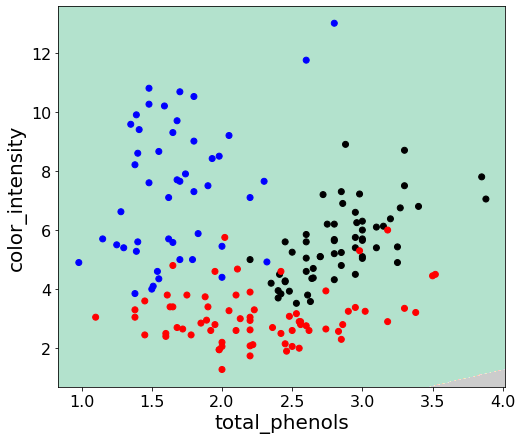

In [23]:
phi = [lambda x0, x1: np.exp(x1), 
       lambda x0, x1: np.exp(x0), 
       lambda x0, x1: np.exp(x0+x1)]
plot_region_scatter(lr,phi)

# Logarithmic features

In [24]:


# X with two basic columns
X = wine.loc[:,[x0,x1]]

X['phi0'] = np.log(X[x0])
X['phi1'] = np.log(X[x1])
X['phi2'] = np.log(X[x0] + X[x1])

# Add nonlinear feature columns
# X0 = wine.loc[:,x0].values
# X1 = wine.loc[:,x1].values
# for i in range(len(phi)):
#     X['phi{0}'.format(i)] = phi[i](X0,X1)

# run logistic regression
lr = LogisticRegression(multi_class='multinomial').fit(X, y)


[<function <lambda> at 0x7fe91e265a60>, <function <lambda> at 0x7fe91e265af0>, <function <lambda> at 0x7fe91e265b80>]


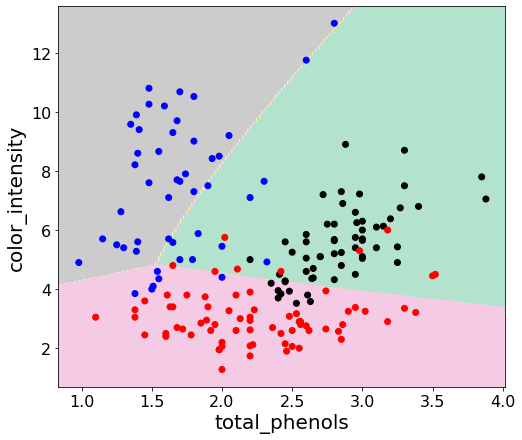

In [25]:
phi = [lambda x0, x1: np.log(x1), 
       lambda x0, x1: np.log(x0), 
       lambda x0, x1: np.log(x0+x1)]
plot_region_scatter(lr,phi)

# trigonometric

In [26]:


# X with two basic columns
X = wine.loc[:,[x0,x1]]

X['phi0'] = np.sin(X[x0])
X['phi1'] = np.sin(X[x1])
X['phi2'] = np.cos(X[x0])
X['phi3'] = np.cos(X[x1])

# Add nonlinear feature columns
# X0 = wine.loc[:,x0].values
# X1 = wine.loc[:,x1].values
# for i in range(len(phi)):
#     X['phi{0}'.format(i)] = phi[i](X0,X1)

# run logistic regression
lr = LogisticRegression(multi_class='multinomial').fit(X, y)


/home/gomes/miniconda3/envs/d178/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[<function <lambda> at 0x7fe9160e0dc0>, <function <lambda> at 0x7fe9160e0e50>, <function <lambda> at 0x7fe9160e0ee0>, <function <lambda> at 0x7fe9160e0f70>]


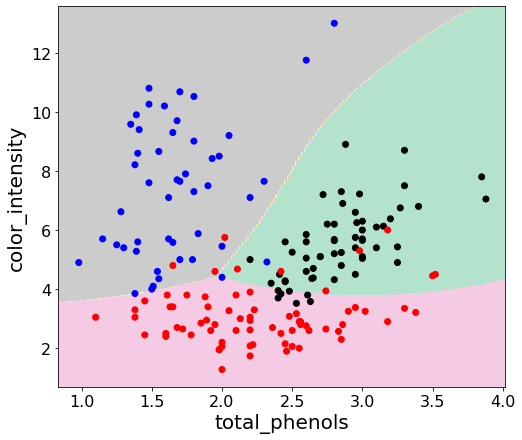

In [27]:
phi = [lambda x0, x1: np.sin(x0), 
       lambda x0, x1: np.sin(x1), 
       lambda x0, x1: np.cos(x0), 
       lambda x0, x1: np.cos(x1) ]
plot_region_scatter(lr,phi)

In [28]:
phi = [lambda x0, x1: np.cos(x1), 
       lambda x0, x1: np.cos(x0),
       lambda x0, x1: np.sin(x1), 
       lambda x0, x1: np.sin(x0),
       lambda x0, x1: np.cos(2*x1), 
       lambda x0, x1: np.cos(2*x0),
       lambda x0, x1: np.sin(2*x1), 
       lambda x0, x1: np.sin(2*x0),
       lambda x0, x1: np.cos(3*x1), 
       lambda x0, x1: np.cos(3*x0),
       lambda x0, x1: np.sin(3*x1), 
       lambda x0, x1: np.sin(3*x0),
       lambda x0, x1: np.cos(4*x1), 
       lambda x0, x1: np.cos(4*x0),
       lambda x0, x1: np.sin(4*x1), 
       lambda x0, x1: np.sin(4*x0)
      ]


# X with two basic columns
X = wine.loc[:,[x0,x1]]

# Add nonlinear feature columns
X0 = wine.loc[:,x0].values
X1 = wine.loc[:,x1].values
for i in range(len(phi)):
    X['phi{0}'.format(i)] = phi[i](X0,X1)

# run logistic regression
lr = LogisticRegression(multi_class='multinomial').fit(X, y)

/home/gomes/miniconda3/envs/d178/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[<function <lambda> at 0x7fe988700f70>, <function <lambda> at 0x7fe98e81b940>, <function <lambda> at 0x7fe91614ec10>, <function <lambda> at 0x7fe9162325e0>, <function <lambda> at 0x7fe916232670>, <function <lambda> at 0x7fe9162524c0>, <function <lambda> at 0x7fe91622eaf0>, <function <lambda> at 0x7fe91622e1f0>, <function <lambda> at 0x7fe91622e8b0>, <function <lambda> at 0x7fe91622e940>, <function <lambda> at 0x7fe915e0d8b0>, <function <lambda> at 0x7fe916186430>, <function <lambda> at 0x7fe915e5bca0>, <function <lambda> at 0x7fe915e5bdc0>, <function <lambda> at 0x7fe915e5b9d0>, <function <lambda> at 0x7fe915ffbee0>]


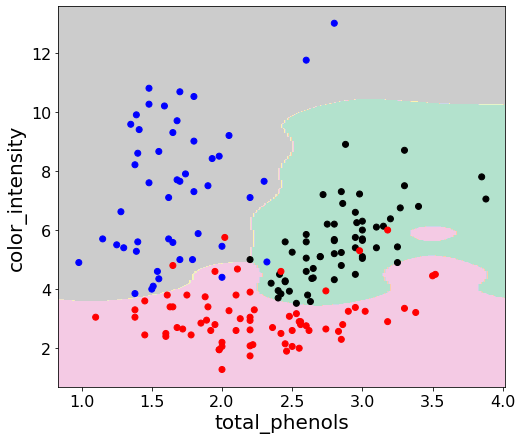

In [29]:

plot_region_scatter(lr,phi)